In [1]:
!pip install lxml
!pip install seaborn
!pip install pytablewriter


!apt install fonts-ipafont-gothic
!rm /content/.cache/matplotlib/fontList.json

    100% |████████████████████████████████| 5.8MB 5.6MB/s 
    100% |████████████████████████████████| 51kB 3.3MB/s 
    100% |████████████████████████████████| 143kB 6.8MB/s 
    100% |████████████████████████████████| 81kB 7.9MB/s 
    100% |████████████████████████████████| 92kB 9.6MB/s 
    100% |████████████████████████████████| 215kB 8.4MB/s 
  Running setup.py bdist_wheel for dominate ... - done
  Stored in directory: /content/.cache/pip/wheels/86/7c/76/a514f343c9e4f85f4c98fe13138ab9c8f756647155c4c1f25e
  Running setup.py bdist_wheel for toml ... - done
  Stored in directory: /content/.cache/pip/wheels/60/a0/8a/eaebd461aa0abf3d38546b12f3b3234de0a39de13374dad39e
  Running setup.py bdist_wheel for simplejson ... - \ | done
  Stored in directory: /content/.cache/pip/wheels/5d/1a/1e/0350bb3df3e74215cd91325344cc86c2c691f5306eb4d22c77
  Running setup.py bdist_wheel for logbook ... - \ done
  Stored in directory: /content/.cache/pip/wheels/3a/50/0d/b67da0bb2a56061970cdf37

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pytablewriter
from google.colab import files

# plt.rcParams['font.family'] = 'IPAPGothic'


sns.set(font=['IPAPGothic'], font_scale=1.5, style='ticks',rc= {'legend.frameon': True})

In [2]:
url = 'https://ehimesvc.jp/?p=70'
dfs = pd.read_html(url, index_col=0, na_values=['活動中止', '終了', '休止'])
df = dfs[0]

# 全部欠測値の行を削除
df.dropna(how='all', inplace=True)

# 合計の行を削除
df.drop('合計', inplace=True)

# 月日を変換
df['日付'] = pd.to_datetime(df.index, format='%m月%d日')

# 年を追加
df['日付'] = df['日付'].apply(lambda x:x.replace(year=2018))

# 日付をインデックス
df.set_index('日付', inplace=True)

# 欠損値を全部0に置換
df.fillna(0, inplace=True)

df

,今治市,宇和島市,大洲市,西予市,松野町,鬼北町
日付,,,,,,
2018-07-10,0.0,35.0,82.0,0.0,0.0,0.0
2018-07-11,71.0,76.0,177.0,201.0,0.0,9.0
2018-07-12,50.0,74.0,284.0,180.0,13.0,12.0
2018-07-13,41.0,198.0,333.0,267.0,33.0,9.0
2018-07-14,131.0,415.0,587.0,823.0,27.0,88.0
2018-07-15,126.0,374.0,1099.0,1081.0,44.0,56.0
2018-07-16,102.0,305.0,491.0,591.0,37.0,50.0
2018-07-17,37.0,157.0,222.0,210.0,4.0,3.0
2018-07-18,37.0,241.0,205.0,149.0,4.0,0.0


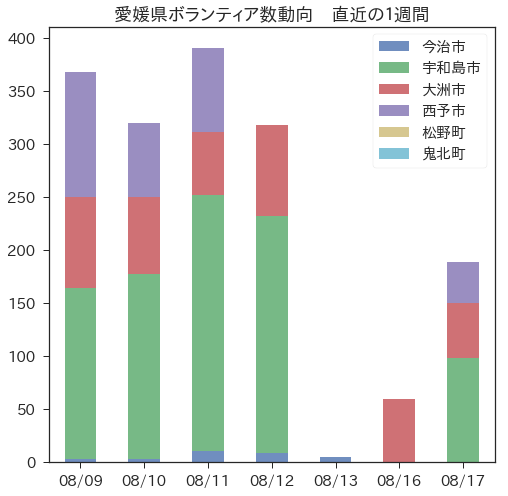

In [3]:
# 一週間
df2 = df.tail(7)
df2.index = df2.index.strftime("%m/%d")

df2.plot.bar(stacked=True, alpha=0.8, figsize=(8,8), rot=0, title='愛媛県ボランティア数動向　直近の１週間')

fig = plt.gcf()
fig.savefig('volunteer_count.png')

In [0]:
files.download('volunteer_count.png')

In [5]:
writer = pytablewriter.MarkdownTableWriter()
writer.from_dataframe(df2.reset_index().rename(columns={'index': '日付'}))
writer.write_table()

|日付 |今治市|宇和島市|大洲市|西予市|松野町|鬼北町|
|-----|-----:|-------:|-----:|-----:|-----:|-----:|
|08/09|     3|     161|    86|   118|     0|     0|
|08/10|     3|     174|    73|    70|     0|     0|
|08/11|    10|     242|    59|    80|     0|     0|
|08/12|     8|     224|    86|     0|     0|     0|
|08/13|     5|       0|     0|     0|     0|     0|
|08/16|     0|       0|    59|     0|     0|     0|
|08/17|     0|      98|    52|    39|     0|     0|



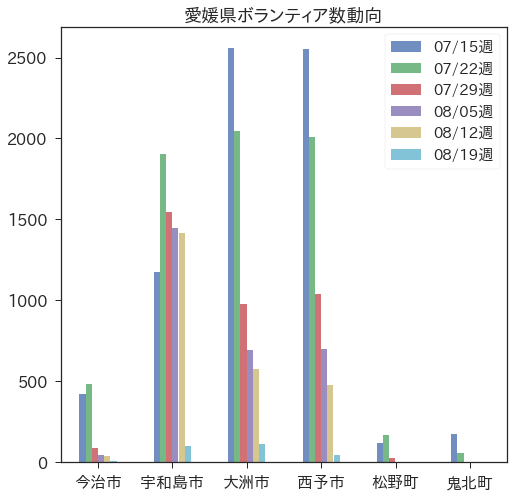

In [6]:
df_w = df.resample('W').sum()
df_w.index = df_w.index.strftime("%m/%d週")
df_w.T.plot.bar(title='愛媛県ボランティア数動向', alpha=0.8, figsize=(8,8), fontsize=16, rot=0)

fig = plt.gcf()
fig.savefig('volunteer_count_week.png')

In [0]:
files.download('volunteer_count_week.png')

In [8]:
df_w

,今治市,宇和島市,大洲市,西予市,松野町,鬼北町
07/15週,419.0,1172.0,2562.0,2552.0,117.0,174.0
07/22週,484.0,1902.0,2044.0,2011.0,164.0,53.0
07/29週,87.0,1546.0,976.0,1036.0,26.0,0.0
08/05週,43.0,1446.0,689.0,700.0,0.0,0.0
08/12週,33.0,1413.0,574.0,472.0,0.0,0.0
08/19週,5.0,98.0,111.0,39.0,0.0,0.0


In [9]:
writer = pytablewriter.MarkdownTableWriter()
writer.from_dataframe(df_w.reset_index().rename(columns={'index': '日付'}))
writer.write_table()

| 日付  |今治市|宇和島市|大洲市|西予市|松野町|鬼北町|
|-------|-----:|-------:|-----:|-----:|-----:|-----:|
|07/15週|   419|    1172|  2562|  2552|   117|   174|
|07/22週|   484|    1902|  2044|  2011|   164|    53|
|07/29週|    87|    1546|   976|  1036|    26|     0|
|08/05週|    43|    1446|   689|   700|     0|     0|
|08/12週|    33|    1413|   574|   472|     0|     0|
|08/19週|     5|      98|   111|    39|     0|     0|



In [10]:
df3_ty = df.tail(2).T
df3_ty.columns = ['昨日','今日']
df3_ty

,昨日,今日
今治市,0.0,0.0
宇和島市,0.0,98.0
大洲市,59.0,52.0
西予市,0.0,39.0
松野町,0.0,0.0
鬼北町,0.0,0.0


In [11]:
# 前日比
df_pre_day = df.diff().fillna(0)
df3_pd = df_pre_day.tail(1).T
df3_pd.columns = ['前日比']
df3_pd

,前日比
今治市,0.0
宇和島市,98.0
大洲市,-7.0
西予市,39.0
松野町,0.0
鬼北町,0.0


In [12]:
# 前週比
df_pre_week = df.diff(7).fillna(0)
df3_pw = df_pre_week.tail(1).T
df3_pw.columns = ['前週比']
df3_pw


,前週比
今治市,-3.0
宇和島市,-75.0
大洲市,-49.0
西予市,39.0
松野町,0.0
鬼北町,0.0


In [13]:
df3 = pd.concat([df3_ty, df3_pd, df3_pw], axis=1)
df3

,昨日,今日,前日比,前週比
今治市,0.0,0.0,0.0,-3.0
宇和島市,0.0,98.0,98.0,-75.0
大洲市,59.0,52.0,-7.0,-49.0
西予市,0.0,39.0,39.0,39.0
松野町,0.0,0.0,0.0,0.0
鬼北町,0.0,0.0,0.0,0.0


In [14]:
df3_filter = df3.loc[['宇和島市', '大洲市', '西予市']]
df3_filter

,昨日,今日,前日比,前週比
宇和島市,0.0,98.0,98.0,-75.0
大洲市,59.0,52.0,-7.0,-49.0
西予市,0.0,39.0,39.0,39.0


In [15]:
writer = pytablewriter.MarkdownTableWriter()
writer.from_dataframe(df3_filter.reset_index().rename(columns={'index': '市町村'}))
writer.write_table()

| 市町村 |昨日|今日|前日比|前週比|
|--------|---:|---:|-----:|-----:|
|宇和島市|   0|  98|    98|   -75|
|大洲市  |  59|  52|    -7|   -49|
|西予市  |   0|  39|    39|    39|



In [0]:
df4 = df.copy()
df4.index = df4.index.strftime("%d")

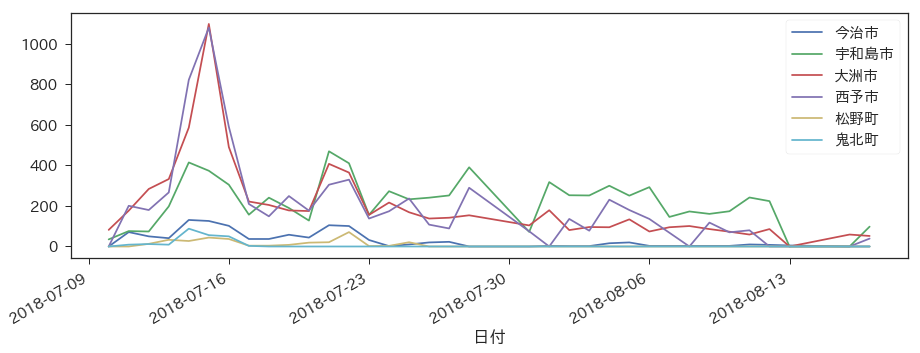

In [17]:
df.plot(figsize=(15, 5))


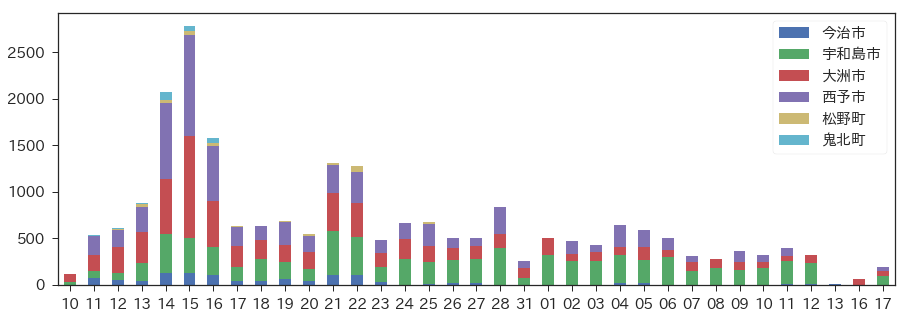

In [18]:
df4.plot.bar(figsize=(15, 5), stacked=True, rot=0)

In [0]:
df5 = df_pre_day.copy()
df6 = df_pre_week.copy()

df5.index = df5.index.strftime("%d")
df6.index = df6.index.strftime("%d")

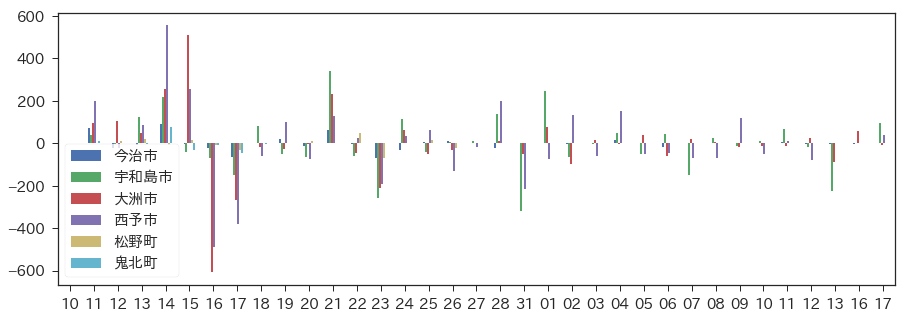

In [20]:
df5.plot.bar(figsize=(15, 5), rot=0)

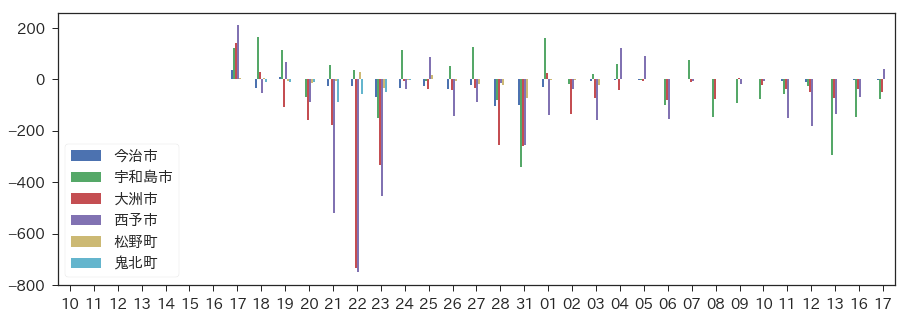

In [21]:
df6.plot.bar(figsize=(15, 5), rot=0)